# Light GBM with KFold

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report , accuracy_score 
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split  ,KFold

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline



In [ ]:
df = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/titanic_train.csv')

In [ ]:
score_train = []
score_test = []

feature = ['Pclass','Sex','Age','Fare']
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df[['Age']] = SimpleImputer(strategy='median').fit_transform(df[['Age']])

X = df[feature]
y = df['Survived']
i=0
nfold = KFold(n_splits=5)
for train_index , test_index in nfold.split(X):

    X_train = X.iloc[train_index]
    X_test =  X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

  
    model = lgb.LGBMClassifier(learning_rate=0.5 ,min_child_samples=10 , max_depth=10 ,  num_leaves=100)
    model.fit(X_train , y_train 
             ,early_stopping_rounds=10,
             eval_metric=['auc','binary'],
             eval_set=[(X_test,y_test)],
             verbose=False,)

    lgb.plot_metric(model , metric='auc')
    lgb.plot_metric(model , metric='binary_logloss')



    # print(i,'Score Train: ', accuracy_score(model.predict(X_train) , y_train))
    print('Score Train: ', accuracy_score(model.predict(X_train) , y_train))
    print('Score Test: ', accuracy_score(model.predict(X_test) , y_test))
    print('_'*100)

    score_train.append((accuracy_score(model.predict(X_train) , y_train)))
    score_test.append((accuracy_score(model.predict(X_test) , y_test)))




In [ ]:
print('Avg train',np.average(score_train) ,'\n' 'Std',np.std(score_train) , '\n')
print('Avg test',np.average(score_test) ,'\n' 'Std',np.std(score_test) , '\n')



# RFE Recursive Feature Elimination

In [230]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier , GradientBoostingClassifier , AdaBoostClassifier , ExtraTreesClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report  , accuracy_score , precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

import warnings 
warnings.filterwarnings('ignore')



              precision    recall  f1-score   support

           0       0.91      0.82      0.86       166
           1       0.63      0.78      0.70        65

    accuracy                           0.81       231
   macro avg       0.77      0.80      0.78       231
weighted avg       0.83      0.81      0.82       231



<Axes: >

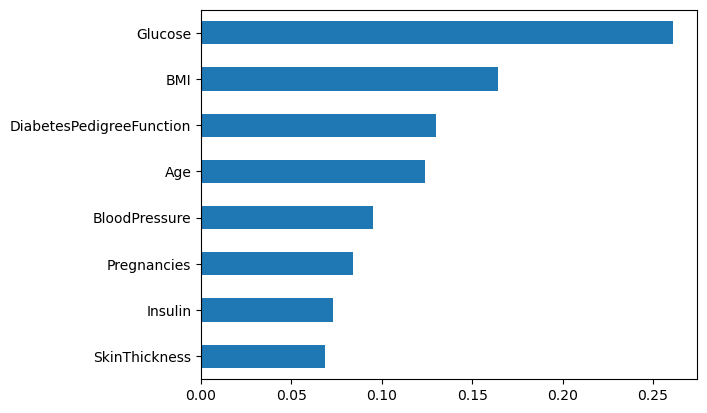

In [334]:
# Find good feature

df = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/diabetes.csv')

column =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[column]
y = df['Outcome']



X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                     test_size=0.3,
                                                     stratify=y,)

# Find best feature
estimator = GradientBoostingClassifier()
selector = RFE(estimator , n_features_to_select=8 ,step=1)
selector = selector.fit(X_train , y_train)

new_feaute = np.array(column)[selector.support_]
X_train_sel = pd.DataFrame(selector.transform(X_train) , columns=new_feaute)
X_test_sel = pd.DataFrame(selector.transform(X_test) , columns=new_feaute)


# Create model
model = RandomForestClassifier()
model.fit(X_train_sel , y_train)
print(classification_report(model.predict(X_test_sel) , y_test))

f_rank = pd.Series(model.feature_importances_ , index=new_feaute).sort_values()
f_rank.plot(kind='barh')

In [335]:
# Logsitic Regression

from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(X_train_sel , y_train)
pred = model_logistic.predict(X_test_sel)
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       150
           1       0.80      0.53      0.64        81

    accuracy                           0.79       231
   macro avg       0.79      0.73      0.74       231
weighted avg       0.79      0.79      0.78       231



# จัดการ วัน เวลา ปี

In [375]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters

pd.set_option('display.max_rows',10)

In [355]:
cols_names = 'Year, Month, Day, UTC Hour, PM2.5, PM10_mask, Retrospective'.replace(', ',',').split(',')
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/Bangkok_pm25.txt'
df = pd.read_csv(url , sep='\t' , skiprows=10 , names=cols_names)

df.drop(columns=['PM10_mask','Retrospective'], inplace=True)

df

,Year,Month,Day,UTC Hour,PM2.5
0,2016,3,3,8,62.9
1,2016,3,3,9,62.9
2,2016,3,3,10,55.5
3,2016,3,3,11,55.5
4,2016,3,3,12,47.9
...,...,...,...,...,...
30387,2020,1,24,3,28.6
30388,2020,1,24,4,32.2
30389,2020,1,24,5,33.0
30390,2020,1,24,6,31.5


In [364]:
df.rename(columns={'UTC Hour': 'Hour'} , inplace=True)
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'PM2.5'], dtype='object')

In [369]:
df['DateTime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']]) + pd.to_timedelta(7 , unit='h')

df

,Year,Month,Day,Hour,PM2.5,DateTime
0,2016,3,3,8,62.9,2016-03-03 15:00:00
1,2016,3,3,9,62.9,2016-03-03 16:00:00
2,2016,3,3,10,55.5,2016-03-03 17:00:00
3,2016,3,3,11,55.5,2016-03-03 18:00:00
4,2016,3,3,12,47.9,2016-03-03 19:00:00
...,...,...,...,...,...,...
30387,2020,1,24,3,28.6,2020-01-24 10:00:00
30388,2020,1,24,4,32.2,2020-01-24 11:00:00
30389,2020,1,24,5,33.0,2020-01-24 12:00:00
30390,2020,1,24,6,31.5,2020-01-24 13:00:00


In [374]:
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour

df['DayName'] = df['DateTime'].dt.strftime('%a')
df

,Year,Month,Day,Hour,PM2.5,DateTime,DayName
0,2016,3,3,15,62.9,2016-03-03 15:00:00,Thu
1,2016,3,3,16,62.9,2016-03-03 16:00:00,Thu
2,2016,3,3,17,55.5,2016-03-03 17:00:00,Thu
3,2016,3,3,18,55.5,2016-03-03 18:00:00,Thu
4,2016,3,3,19,47.9,2016-03-03 19:00:00,Thu
...,...,...,...,...,...,...,...
30387,2020,1,24,10,28.6,2020-01-24 10:00:00,Fri
30388,2020,1,24,11,32.2,2020-01-24 11:00:00,Fri
30389,2020,1,24,12,33.0,2020-01-24 12:00:00,Fri
30390,2020,1,24,13,31.5,2020-01-24 13:00:00,Fri


# Light GBM Regression
